<a href="https://colab.research.google.com/github/Vishesh-16/Data-Projects/blob/main/Case_Study_WALMART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

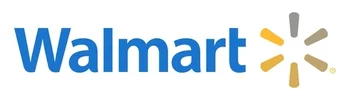

<font color='blue'>**Walmart**</font>  is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# **PROBLEM STATEMENT**

- **Identifying Purchase Trends:**
  - What factors (e.g., age, gender, city category) significantly influence the purchase amount?
  - Which product categories generate the highest revenue?
- **Customer Segmentation:**
  - How can customers be grouped based on their purchasing behavior?
  - What are the spending patterns of different demographics?
- **Predicting Purchase Behavior:**
  - Can we predict a customer's purchase amount based on their demographics and prior behavior?
- **Optimizing Marketing Strategies:**
  - How can Walmart target specific customer groups for promotions and campaigns to maximize sales?

# **IMPORTING LIBRARIES AND DATASET**

In [ ]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# IMPORTING DATASET

!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094" -O walmart.csv
df = pd.read_csv("walmart.csv")

--2025-01-22 13:10:15--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.91, 18.64.229.71, 18.64.229.135, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M   111MB/s    in 0.2s    

2025-01-22 13:10:15 (111 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



In [ ]:
# A GLIMPSE OF THE WALMART DATASET

df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Observations on shape of data, data types of all the attributes**

In [ ]:
# SHAPE OF THE DATASET - NO OF ROWS AND COLUMNS

df.shape

(550068, 10)

In [ ]:
print("No of Rows =", df.shape[0])
print("No of Columns =", df.shape[1])

No of Rows = 550068
No of Columns = 10


In [ ]:
# NAME OF COLUMNS AND THEIR DATATYPE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# DESCRIPTIVE STATISTICS SUMMARY OF THE GIVEN DATAFRAME

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


# **NULL AND DUPLICATE VALUES**

In [ ]:
# CALCULATING NUMBER OF NULL VALUES IN ALL COLUMNS

print("-------------------------------------------")
print("No. of Null values in different columns :")
print("-------------------------------------------")
print(df.isnull().sum().sort_values(ascending=False),"\n")

-------------------------------------------
No. of Null values in different columns :
-------------------------------------------
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64 



In [ ]:
# CHECKING FOR DUPLICATE ROWS

duplicate_rows = df[df.duplicated()]
print("No of Duplicate rows = ",duplicate_rows.shape[0])

No of Duplicate rows =  0


<font color='blue'>**ANALYSIS**<font>

The analysis implies a clean data without any Null values nor any duplicate values, which eases the process of Data cleaning and Visualisation.

# **OUTLIERS**

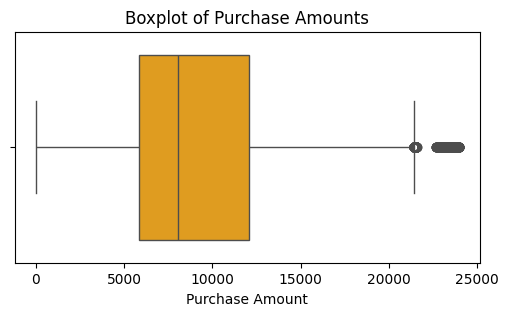

In [ ]:
# CHECK FOR OUTLIERS

plt.figure(figsize=(6,3))
sns.boxplot(data=df, x="Purchase", color="orange")
plt.title("Boxplot of Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.show()


In [ ]:
q1=df.Purchase.quantile(0.25)
q3=df.Purchase.quantile(0.75)
print("Q1,Q3 :",q1,q3)
IQR=q3-q1
print("Inter-Quartile-Range = q3 - q1 =",IQR)
outliers = df[((df.Purchase<(q1-1.5*IQR)) | (df.Purchase>(q3+1.5*IQR)))]

print("Percentage of Outliers in the Dataset : ",len(outliers)/len(df))

Q1,Q3 : 5823.0 12054.0
Inter-Quartile-Range = q3 - q1 = 6231.0
Percentage of Outliers in the Dataset :  0.004866671029763593


<font color='blue'>**ANALYSIS**<font>

- **Insight:**
  - The majority of the purchase values are concentrated between 5823.0 and 12054.0.
- **Spread and Variability:**
  - A relatively moderate IQR of 6231.0 suggests that the central portion of the data has a reasonable spread without extreme variability.
- **Low Outlier Percentage:**
  - Since the percentage of outliers is very low (~0.49%), the dataset is relatively clean and doesn't have many extreme values affecting the overall analysis.

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Unique Values**

In [ ]:
print("Number of Distinct User_ids :",df.User_ID.nunique())
print("Number of Distinct Product_ids :",df.Product_ID.nunique())

Number of Distinct User_ids : 5891
Number of Distinct Product_ids : 3631


In [ ]:
# % share of all major attributes
columns = ['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status','City_Category']
df[columns].melt().groupby(['variable', 'value'])[['value']].count()*100/len(df)

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

# **UNIVARIATE and BIVARIATE ANALYSIS**

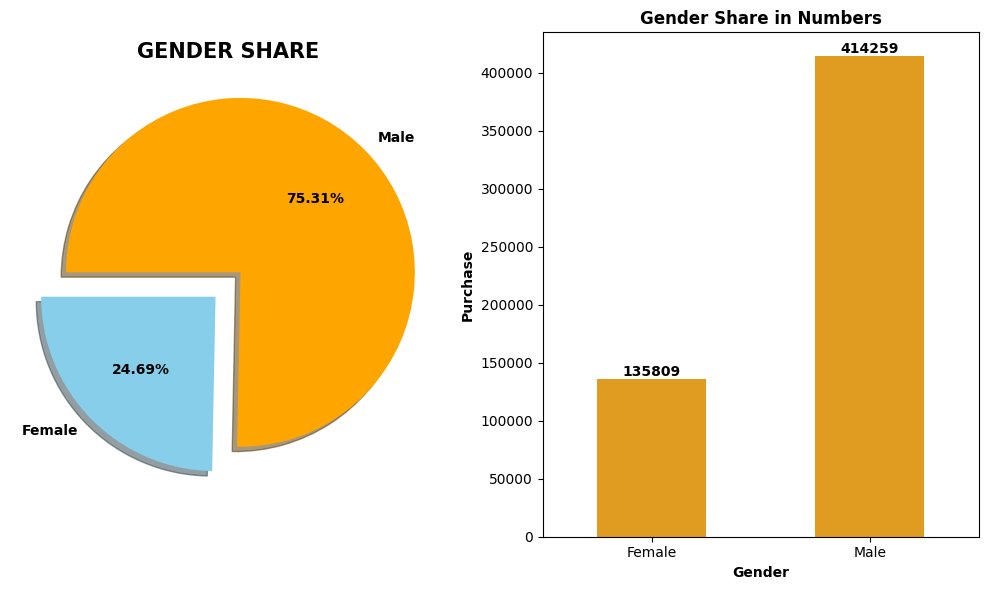

In [ ]:
a = df.groupby("Gender")["Purchase"].count()
b = pd.DataFrame(a).reset_index()

fig, axs = plt.subplots(nrows=1,ncols= 2, figsize=(10, 6))
axs[0].pie(
    a,labels=["Female", "Male"],autopct='%.2f%%', colors=["skyblue", "orange"],explode=[0.1, 0.1],radius=1,startangle=180,shadow=True, textprops={"fontsize":10, "color":"black", "weight":"bold"})
axs[0].set_title("GENDER SHARE", fontsize=15, color="black", weight="bold")

sns.barplot(x='Gender', y='Purchase', data=b, ax=axs[1], width=0.5, color='orange')
axs[1].bar_label(axs[1].containers[0], weight="bold")
axs[1].set_xlabel("Gender", weight="bold")
axs[1].set_ylabel("Purchase", weight="bold")
axs[1].set_xticks([0, 1], ["Female", "Male"])
axs[1].set_title("Gender Share in Numbers", weight="bold")

plt.tight_layout()
plt.show()


<font color ='blue'>**ANALYSIS**<font>

Males have. asignificant margin in their share of purchase as compared to Females, owing to more product categories in their favour and also owing to the Occupation factor.

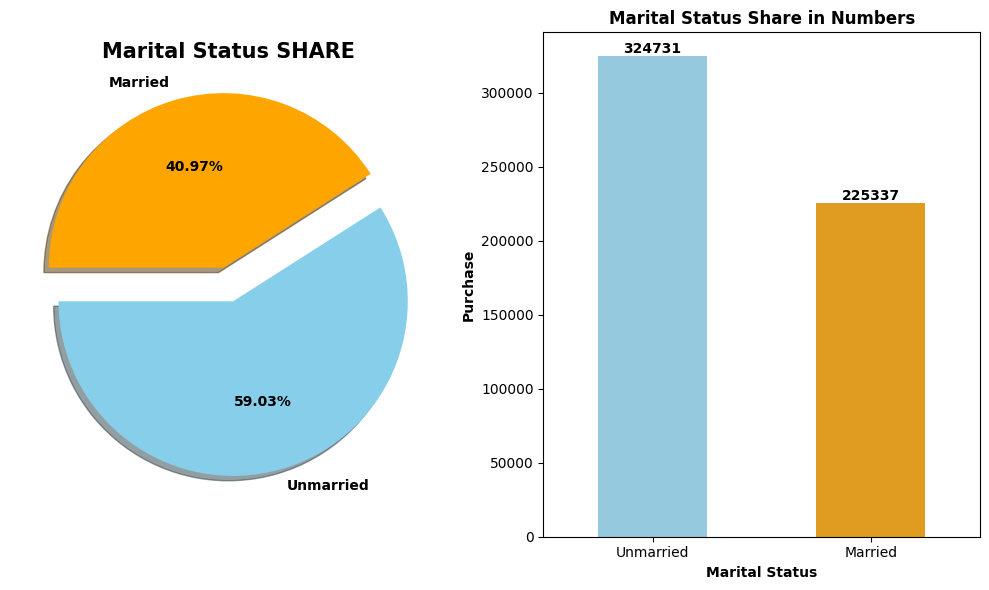

In [ ]:
c = df.groupby("Marital_Status")["Purchase"].count()
d = pd.DataFrame(c).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].pie(c,labels=["Unmarried", "Married"],autopct='%.2f%%',colors=["skyblue", "orange"],explode=[0.1, 0.1],radius=1,startangle=180,shadow=True,textprops={"fontsize":10, "color":"black", "weight":"bold"})
axs[0].set_title("Marital Status SHARE", fontsize=15, color="black", weight="bold")

sns.barplot(x='Marital_Status', y='Purchase', data=d, ax=axs[1], width=0.5, palette=["skyblue", "orange"])
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%d', weight="bold")
axs[1].set_xlabel("Marital Status", weight="bold")
axs[1].set_ylabel("Purchase", weight="bold")
axs[1].set_xticks([0, 1], ["Unmarried", "Married"])
axs[1].set_title("Marital Status Share in Numbers", weight="bold")

plt.tight_layout()
plt.show()


<font color='blue'>**ANALYSIS**<font>

- Marital Status has little impact on the Purchase parity as compared to gender, owing to the differnce of 20% in their respective shares.

- Unmarried Customers leading the race between the two.

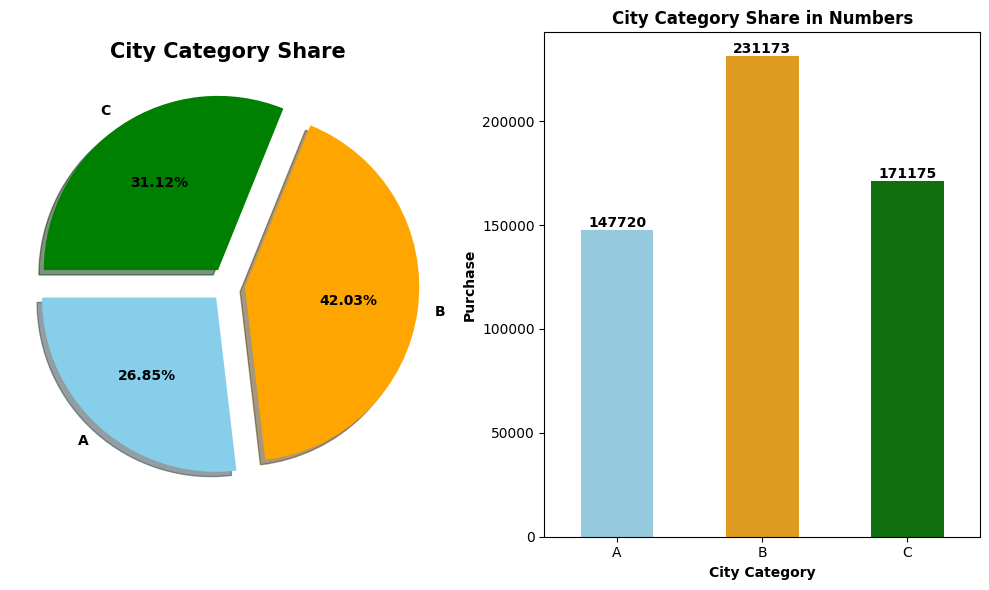

In [ ]:
a = df.groupby("City_Category")["Purchase"].count()
b = pd.DataFrame(a).reset_index()

fig, axs = plt.subplots(nrows=1,ncols= 2, figsize=(10,6))

axs[0].pie(a,labels=["A", "B", "C"],autopct='%.2f%%',colors=["skyblue", "orange", "green"],explode=[0.1, 0.1, 0.1],radius=1,startangle=180,shadow=True,textprops={"fontsize":10, "color":"black", "weight":"bold"})
axs[0].set_title("City Category Share", fontsize=15, color="black", weight="bold")

sns.barplot(x='City_Category', y='Purchase', data=b, ax=axs[1], width=0.5, palette=["skyblue", "orange", "green"])
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%d', weight="bold")
axs[1].set_xlabel("City Category", weight="bold")
axs[1].set_ylabel("Purchase", weight="bold")
axs[1].set_title("City Category Share in Numbers", weight="bold")

plt.tight_layout()
plt.show()


<font color = ' blue'>**ANALYSIS**<font>

- City B has a major share of Purchase, signalling its size and modernity.
- City A and C donot have any major difference in their contributions, difference margin being only 5%.

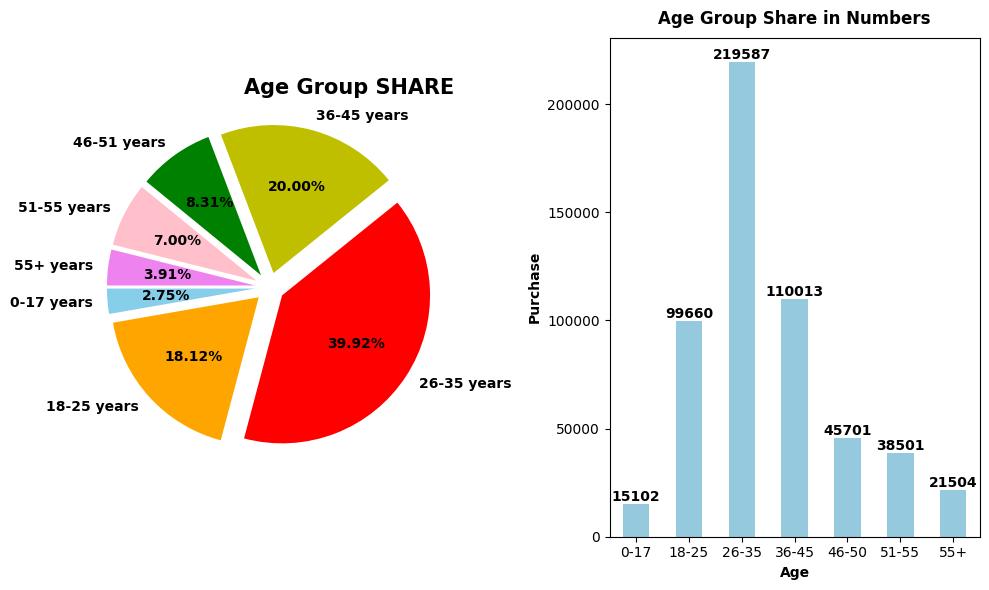

In [ ]:
a = df.groupby("Age")["Purchase"].count()
b = pd.DataFrame(a).reset_index()

fig, axs = plt.subplots(nrows=1,ncols= 2, figsize=(10,6))

axs[0].pie(a,labels=["0-17 years", "18-25 years", "26-35 years", "36-45 years", "46-51 years", "51-55 years", "55+ years"],explode=[0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1],autopct='%.2f%%',colors=["skyblue", "orange", "r", "y", "g", "pink", "violet"],radius=1,startangle=180,shadow=False,textprops={"fontsize":10, "color":"black", "weight":"bold"})
axs[0].set_title("Age Group SHARE", fontsize=15, color="black", weight="bold", loc="right")

sns.barplot(x='Age', y='Purchase', data=b, ax=axs[1], width=0.5, color='skyblue')
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%d', weight="bold")
axs[1].set_xlabel("Age", weight="bold")
axs[1].set_ylabel("Purchase", weight="bold")
axs[1].set_title("Age Group Share in Numbers", weight="bold", pad=10)

plt.tight_layout()
plt.show()


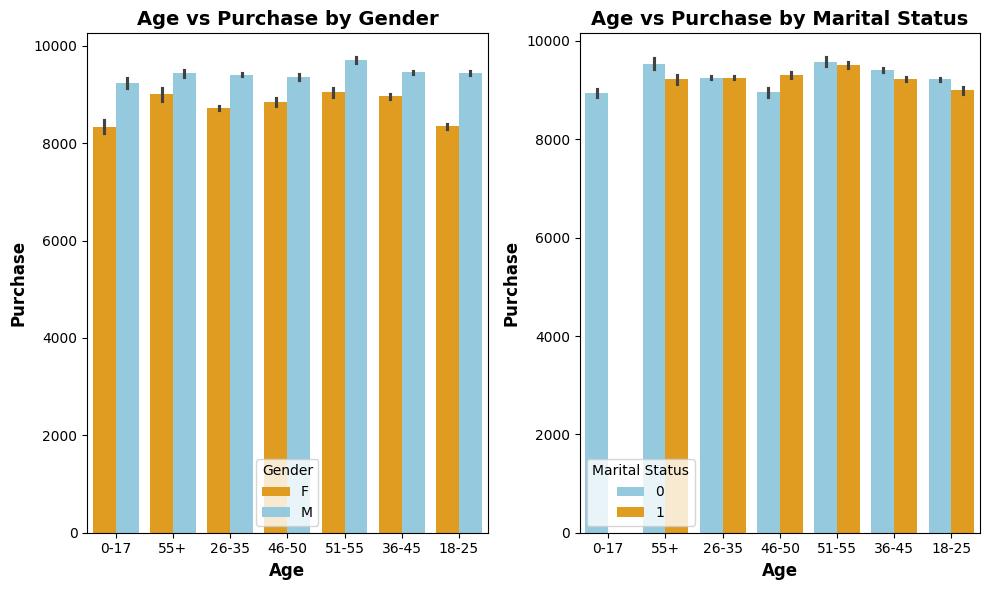

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols= 2, figsize=(10, 6))

# Age(Gender) vs Purchase
sns.barplot(data=df, x='Age', y='Purchase', hue="Gender", ax=axs[0],palette={"M": "skyblue", "F": "orange"})
axs[0].set_title("Age vs Purchase by Gender", fontsize=14, weight="bold")
axs[0].set_xlabel("Age", fontsize=12, weight="bold")
axs[0].set_ylabel("Purchase", fontsize=12, weight="bold")
axs[0].legend(title="Gender", fontsize=10)

# Age(Marital) vs Purchase
sns.barplot(data=df, x='Age', y='Purchase', hue="Marital_Status", ax=axs[1],palette={0: "skyblue", 1: "orange"})
axs[1].set_title("Age vs Purchase by Marital Status", fontsize=14, weight="bold")
axs[1].set_xlabel("Age", fontsize=12, weight="bold")
axs[1].set_ylabel("Purchase", fontsize=12, weight="bold")
axs[1].legend(title="Marital Status",fontsize=10)

plt.tight_layout()
plt.show()


<font color = 'blue'>**ANALYSIS**<font>

- Age Attribute shows a major tilt towards 26-35 age group who contribute the maximum, followed by 36-45 group.

- The least contribution is from the kids-teen age group of 0-17 yrs, evident from the deciated academics.

- The Age group parameters have no significant efect from factors like Marital Status and Gender evident from the euqal length plots.

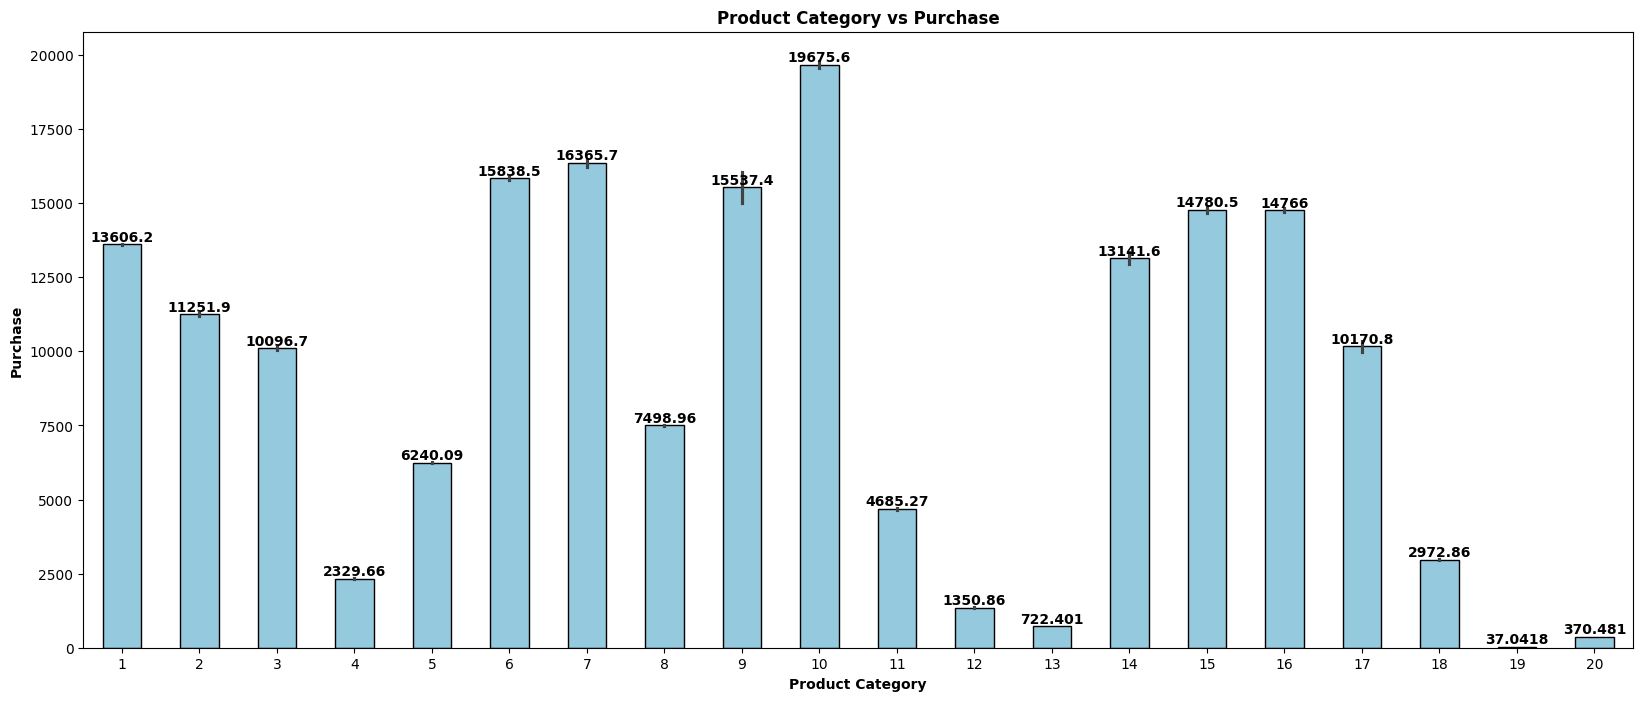

In [ ]:
fig = plt.figure(figsize=(20,8))
ax=sns.barplot(x='Product_Category',y='Purchase',data=df,width=0.5,color='skyblue',edgecolor='black')
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Product Category",weight="bold")
plt.ylabel("Purchase",weight="bold")
plt.title('Product Category vs Purchase',weight="bold")

plt.show()

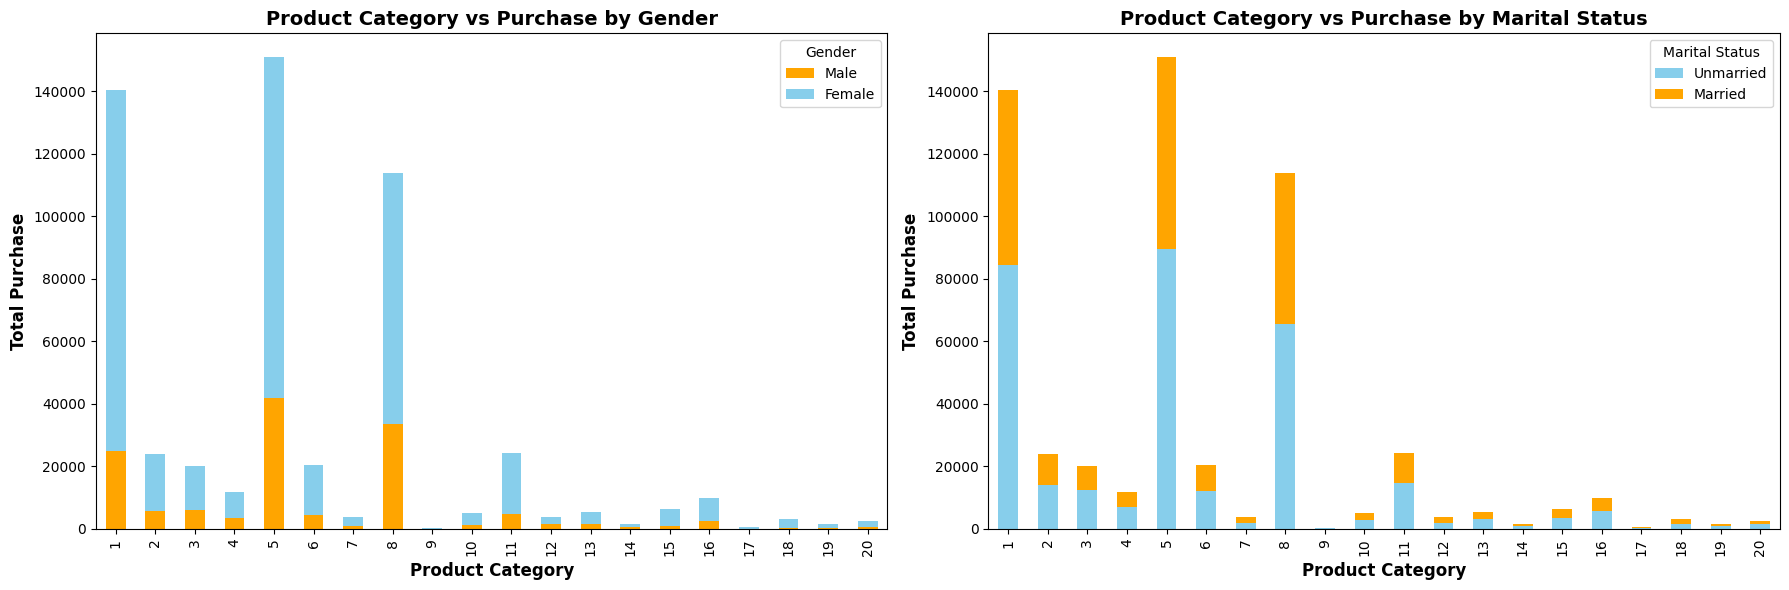

In [ ]:

gender_data = df.groupby(['Product_Category', 'Gender'])['Purchase'].count().unstack()
marital_data = df.groupby(['Product_Category', 'Marital_Status'])['Purchase'].count().unstack()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

gender_data.plot(kind='bar',stacked=True,ax=axs[0],color={"M": "skyblue", "F": "orange"})
axs[0].set_title("Product Category vs Purchase by Gender", fontsize=14, weight="bold")
axs[0].set_xlabel("Product Category", fontsize=12, weight="bold")
axs[0].set_ylabel("Total Purchase", fontsize=12, weight="bold")
axs[0].legend(title="Gender", labels=["Male", "Female"], fontsize=10)

marital_data.plot(kind='bar', stacked=True,ax=axs[1], color={0: "skyblue", 1: "orange"})
axs[1].set_title("Product Category vs Purchase by Marital Status", fontsize=14, weight="bold")
axs[1].set_xlabel("Product Category", fontsize=12, weight="bold")
axs[1].set_ylabel("Total Purchase", fontsize=12, weight="bold")
axs[1].legend(title="Marital Status", labels=["Unmarried", "Married"], fontsize=10)

plt.tight_layout()
plt.show()


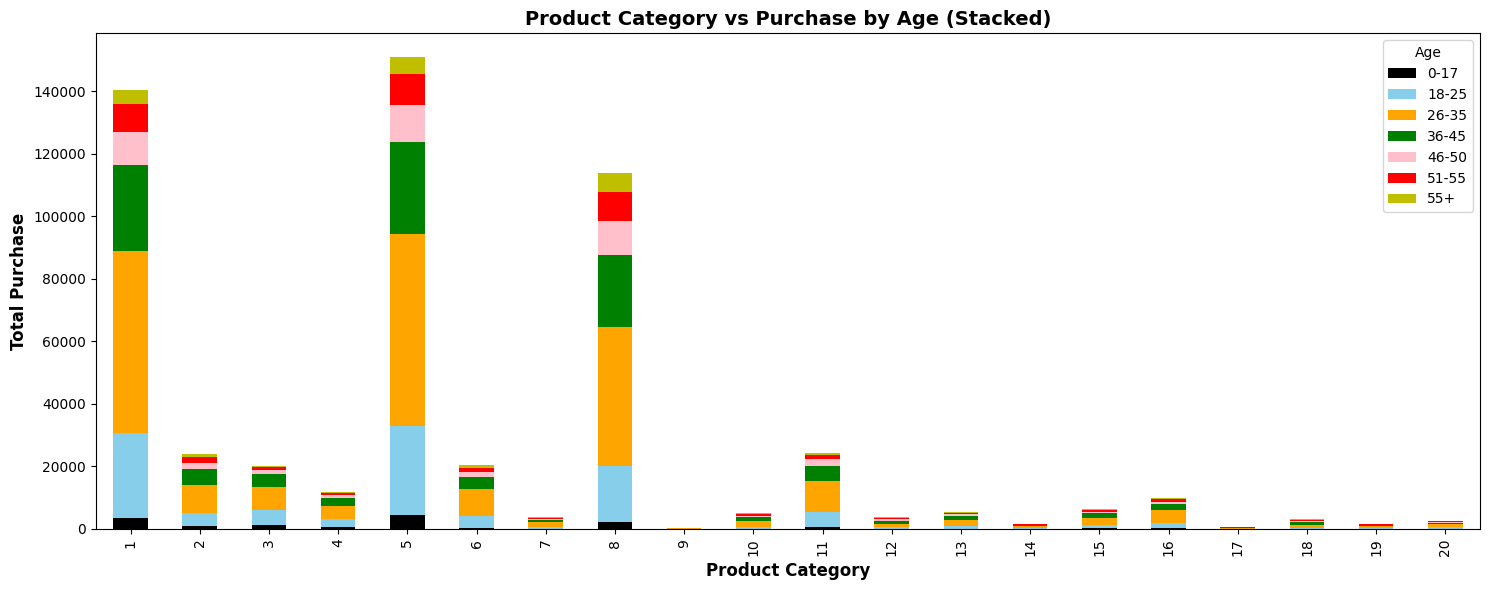

In [ ]:
purchase_age_category = df.groupby(['Product_Category', 'Age'])['Purchase'].count().unstack()
purchase_age_category.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 6),
    color={'0-17': 'black', '18-25': 'skyblue', '26-35': 'orange', '36-45': 'green', '46-50': 'pink', '51-55': 'r', '55+': 'y'}
)
plt.title("Product Category vs Purchase by Age (Stacked)", fontsize=14, weight="bold")
plt.xlabel("Product Category", fontsize=12, weight="bold")
plt.ylabel("Total Purchase", fontsize=12, weight="bold")
plt.legend(title="Age", fontsize=10)
plt.tight_layout()
plt.show()


<font color= 'blue'>**Key Insights:**<font>
- Category 1, 5, and 8 are the top contributors across all demographics, indicating popular product segments.
- **Groups with higher contributions:**
  - Age: 26–35 and 36–45 dominate purchases.
  - Gender: Females contribute more overall.
  - Marital Status: Unmarried individuals are key buyers.
- Categories outside the top three (1, 5, 8) show more balanced but smaller contributions across all demographics.

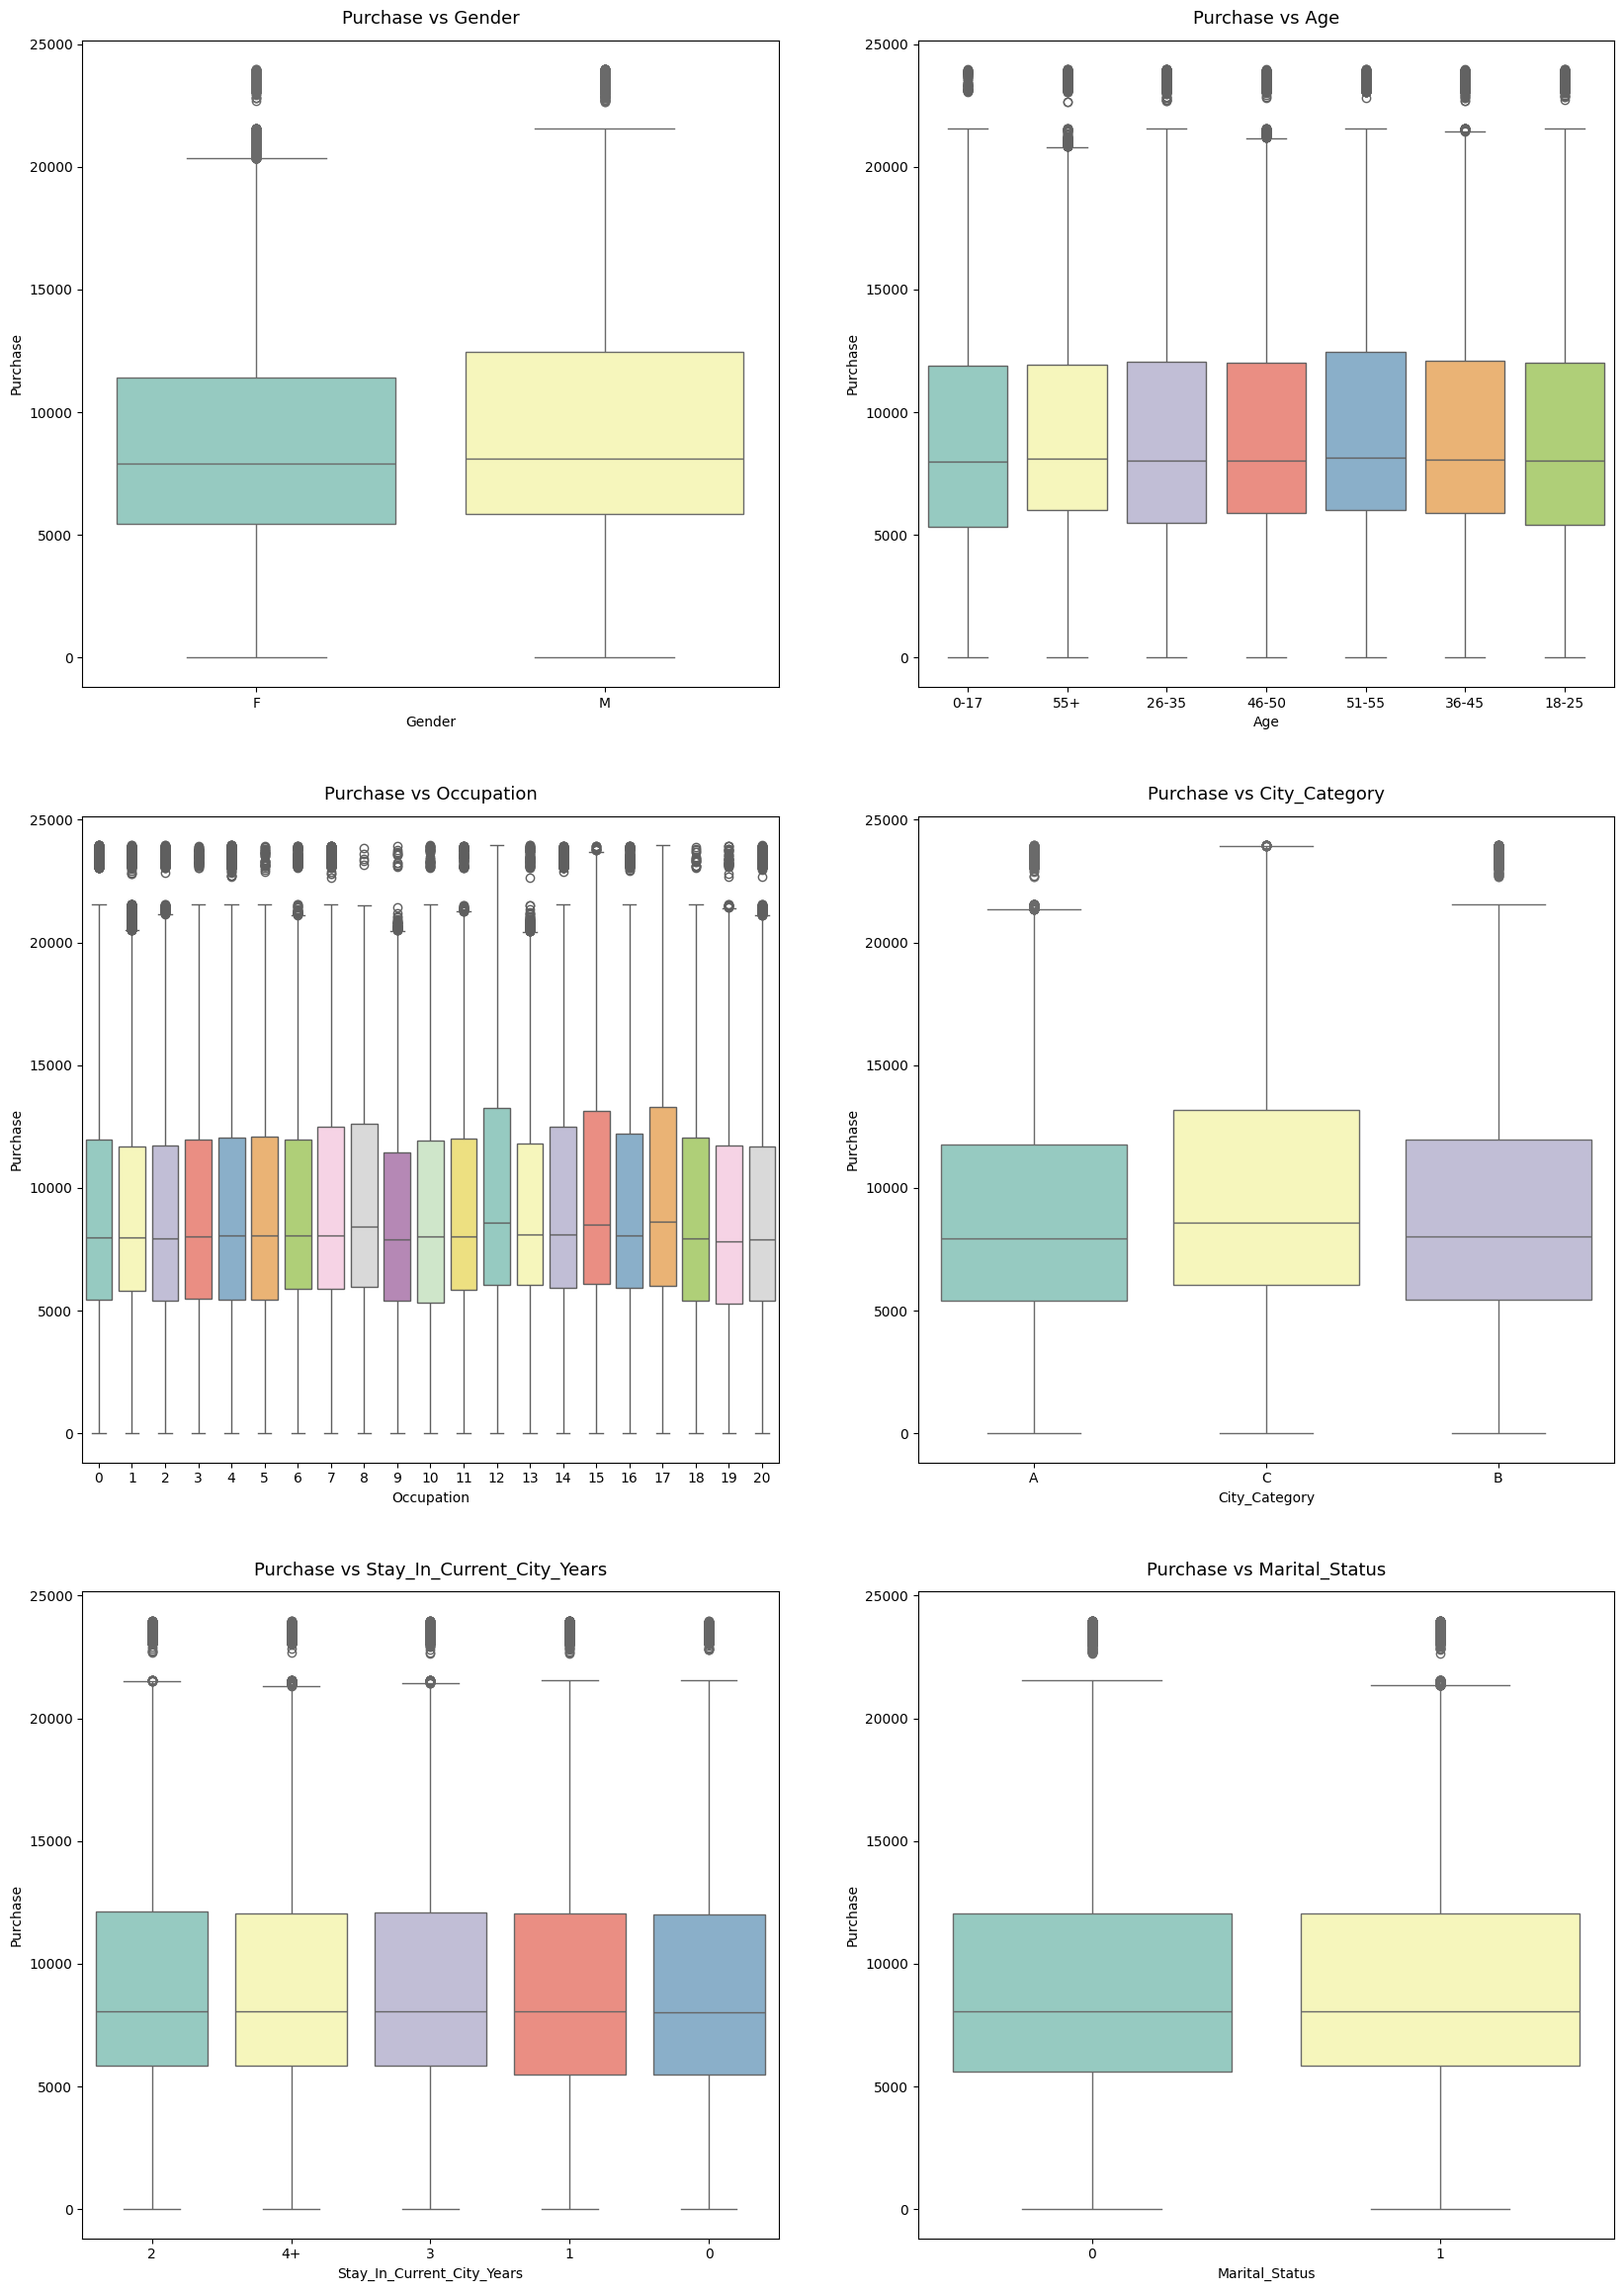

In [ ]:

columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.5)
count = 0
for row in range(3):
    for col in range(2):
        plt.subplot(3, 2, count+1)
        sns.boxplot(data=df, y='Purchase', x=columns[count], hue=columns[count], ax=axs[row, col],palette="Set3" ,legend=False)
        axs[row, col].set_title(f"Purchase vs {columns[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

<font color = "blue">**ANALYSIS**<font>

- **Purchase vs. Gender:**
  - Males tend to have slightly higher purchase amounts compared to females, as indicated by the median and range.
- **Purchase vs. Age:**
  - The purchase distribution is fairly similar across age groups, but the median purchase amount is slightly higher in the 26–35 age group compared to others.
- **Purchase vs. Occupation:**
  - There is no significant variation in purchase amounts across occupations. The median and spread appear consistent across different occupation categories.
- **Purchase vs. City Category:**
  - City Category C exhibits the highest median purchase amount, followed by Category B and A. However, all categories have outliers indicating high purchase amounts.
- **Purchase vs. Stay in Current City Years:**
  - The duration of stay in the current city does not seem to greatly affect purchase amounts, with similar medians and spread across all categories.
- **Purchase vs. Marital Status:**
  - Marital status shows a slight variation in purchases. Unmarried individuals (coded as 0) have a slightly lower median purchase amount compared to married individuals (coded as 1).

- **Insights:**
  - There are minor differences in purchase behavior based on gender, age, city category, and marital status.
  - Occupation and stay duration have minimal impact on purchase amounts.
  - There are high-value outliers in all categories, which might represent brand offer purchases at big intervals like 10,000 or 15,000 or 20,000 or frequent buyers.





# **QUESTIONS**

## **1. Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
average_spent = df.groupby('Gender')['Purchase'].mean()

print("Average amount spent per transaction by gender:")
print("------------------------------------------------")
print(round(average_spent,2))

Average amount spent per transaction by gender:
------------------------------------------------
Gender
F    8734.57
M    9437.53
Name: Purchase, dtype: float64


<font color = "blue">**ANALYSIS**<font>

The dominance of Males over females in the Average Spending owes to factors like product categories which may be men-centric like Harware tools, automobile parts like product categories -1,5,8 which lead the Purchase of Walmart.

##  **2. Confidence intervals and distribution of the mean of the expenses by female and male customers**

### **SAMPLE DISTRIBUTION FOR MALES AND FEMALES**

In [ ]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


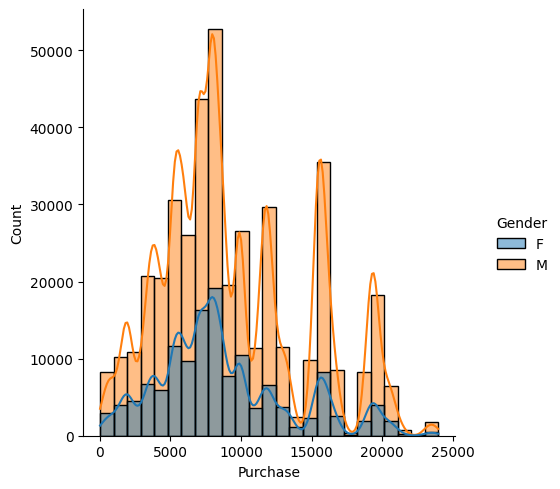

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Gender', data=df )
plt.show()

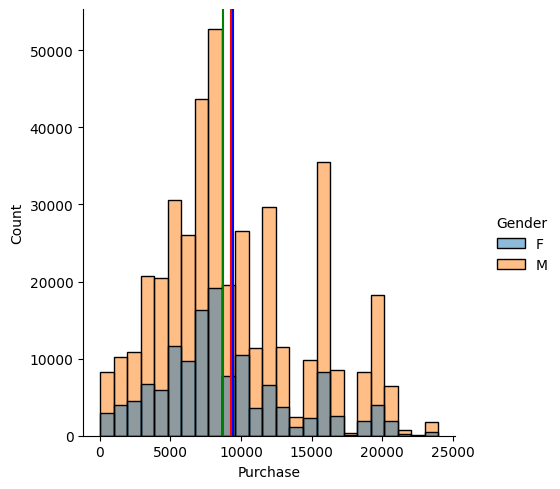

In [ ]:

sns.displot(x='Purchase', data=df, bins=25, hue='Gender')
plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(), color='b')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(), color='g')

plt.show()

### **SAMPLING FOR FEMALE**

In [ ]:
female_data = df[df["Gender"]=="F"]
female_mean=female_data["Purchase"].mean()
female_std=female_data["Purchase"].std()
print("Female Purchase amount Mean:",female_mean)
print("Female Purchase amount Standard Deviation:",female_std)

Female Purchase amount Mean: 8734.565765155476
Female Purchase amount Standard Deviation: 4767.233289291444


<font color = "blue">**RANDOM SAMPLING of DATA FOR FEMALES**<font>

*   **No. of Samples = 1000**
*   **Sample Size = 100,300,600**





In [ ]:
female_sample_mean_100=[df[df['Gender']=='F'].sample(100, replace=True)['Purchase'].mean() for i in range(1000)]
female_sample_mean_300=[df[df['Gender']=='F'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]
female_sample_mean_600=[df[df['Gender']=='F'].sample(600, replace=True)['Purchase'].mean() for i in range(1000)]

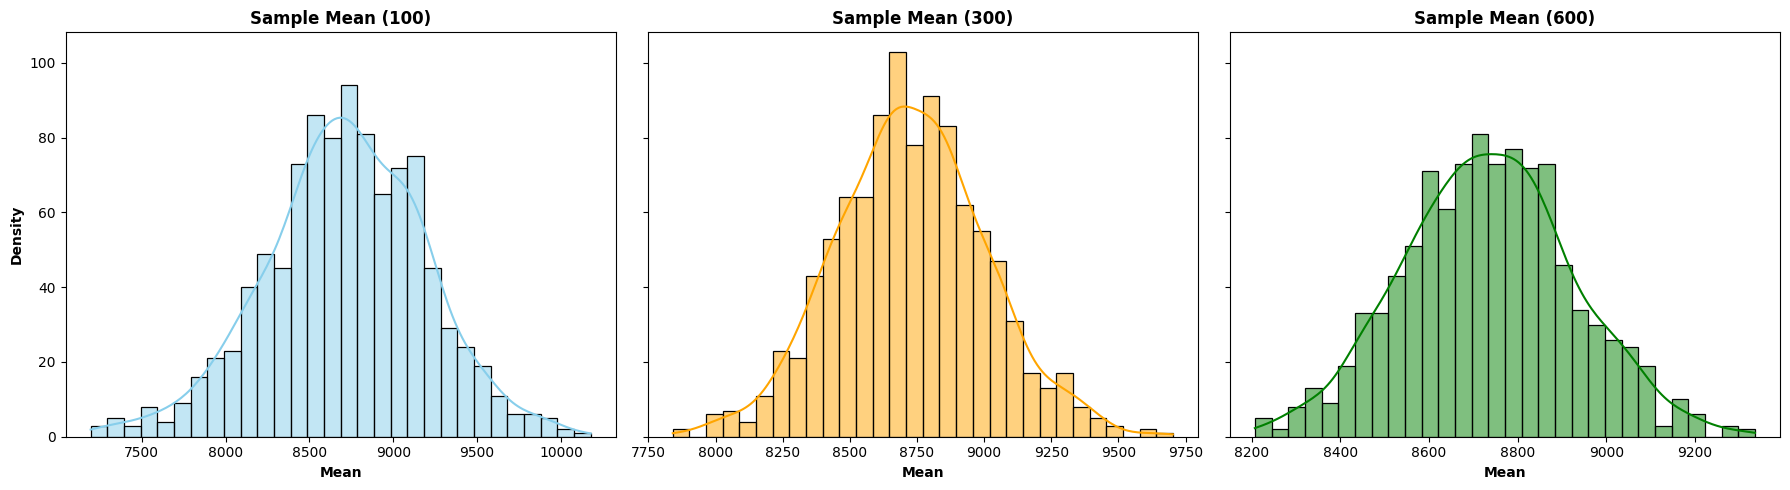

In [ ]:
#Plotting the 3 sample means

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

# Plot 1: male_sample_mean_100
sns.histplot(female_sample_mean_100, bins=30, kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Sample Mean (100)", fontsize=12, weight="bold")
axs[0].set_xlabel("Mean", fontsize=10, weight="bold")
axs[0].set_ylabel("Density", fontsize=10, weight="bold")

# Plot 2: male_sample_mean_300
sns.histplot(female_sample_mean_300, bins=30, kde=True, ax=axs[1], color="orange")
axs[1].set_title("Sample Mean (300)", fontsize=12, weight="bold")
axs[1].set_xlabel("Mean", fontsize=10, weight="bold")
axs[1].set_ylabel("Density", fontsize=10)

# Plot 3: male_sample_mean_600
sns.histplot(female_sample_mean_600, bins=30, kde=True, ax=axs[2], color="green")
axs[2].set_title("Sample Mean (600)", fontsize=12, weight="bold")
axs[2].set_xlabel("Mean", fontsize=10, weight="bold")
axs[2].set_ylabel("Density", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
print("Sample distribution mean for Females (SS = 100) : ",sum(female_sample_mean_100) / len(female_sample_mean_100))
print("Sample distribution mean for Females (SS = 300) : ",sum(female_sample_mean_300) / len(female_sample_mean_300))
print("Sample distribution mean for Females (SS = 600) : ",sum(female_sample_mean_600) / len(female_sample_mean_600))

m=(8714.21 + 8726.53 + 8733.44)/3
print("Sample Distribution Mean for Females = " , m )

Sample distribution mean for Females (SS = 100) :  8714.218399999989
Sample distribution mean for Females (SS = 300) :  8726.533736666664
Sample distribution mean for Females (SS = 600) :  8733.445721666654
Sample Distribution Mean for Females =  8724.726666666667


### **SAMPLING FOR MALES**

In [ ]:
male_data = df[df["Gender"]=="M"]
male_mean=male_data["Purchase"].mean()
male_std=male_data["Purchase"].std()
print("Male Purchase amount Mean:",male_mean)
print("Male Purchase amount Standard Deviation:",male_std)

Male Purchase amount Mean: 9437.526040472265
Male Purchase amount Standard Deviation: 5092.186209777949


<font color = "blue">**RANDOM SAMPLING of DATA FOR MALES**<font>

*   **No. of Samples = 1000**
*   **Sample Size = 100,300,600**





In [ ]:
male_sample_mean_100=[df[df['Gender']=='M'].sample(100, replace=True)['Purchase'].mean() for i in range(1000)]
male_sample_mean_300=[df[df['Gender']=='M'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]
male_sample_mean_600=[df[df['Gender']=='M'].sample(600, replace=True)['Purchase'].mean() for i in range(1000)]

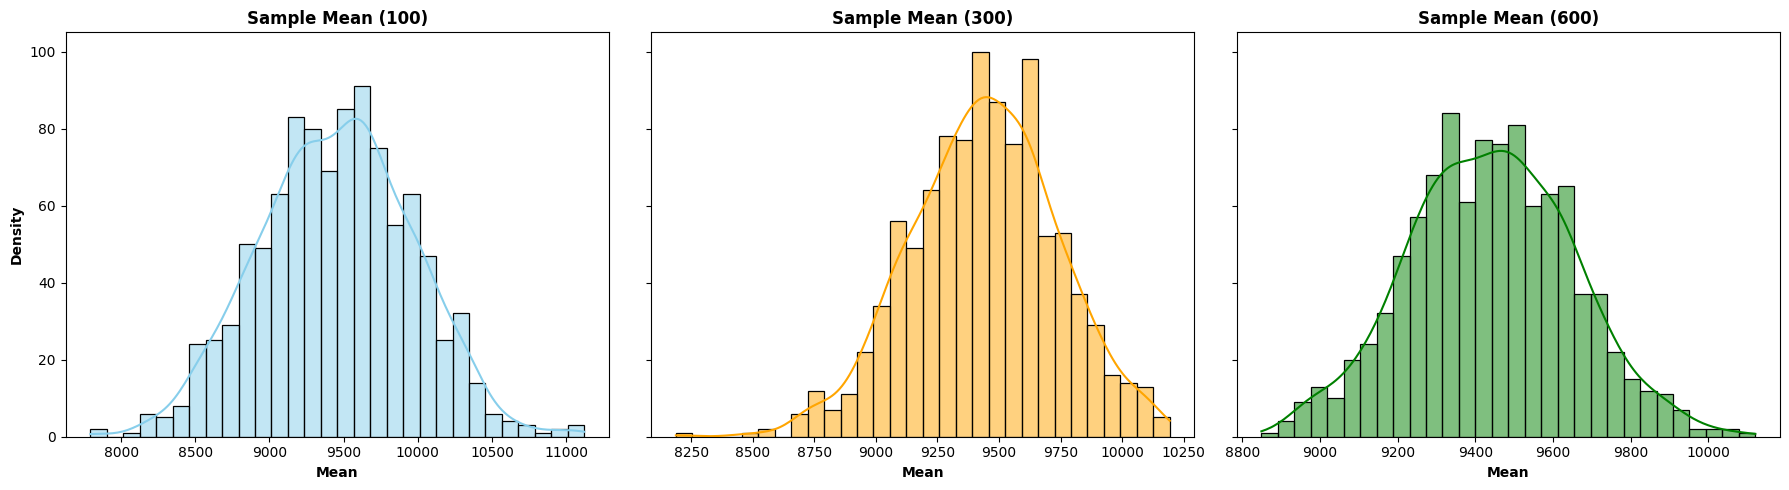

In [ ]:
#Plotting the 3 sample means

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

# Plot 1: male_sample_mean_100
sns.histplot(male_sample_mean_100, bins=30, kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Sample Mean (100)", fontsize=12, weight="bold")
axs[0].set_xlabel("Mean", fontsize=10, weight="bold")
axs[0].set_ylabel("Density", fontsize=10, weight="bold")

# Plot 2: male_sample_mean_300
sns.histplot(male_sample_mean_300, bins=30, kde=True, ax=axs[1], color="orange")
axs[1].set_title("Sample Mean (300)", fontsize=12, weight="bold")
axs[1].set_xlabel("Mean", fontsize=10, weight="bold")
axs[1].set_ylabel("Density", fontsize=10)

# Plot 3: male_sample_mean_600
sns.histplot(male_sample_mean_600, bins=30, kde=True, ax=axs[2], color="green")
axs[2].set_title("Sample Mean (600)", fontsize=12, weight="bold")
axs[2].set_xlabel("Mean", fontsize=10, weight="bold")
axs[2].set_ylabel("Density", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
print("Sample distribution mean for Males (SS = 100) : ",sum(male_sample_mean_100) / len(male_sample_mean_100))
print("Sample distribution mean for Males (SS = 300) : ",sum(male_sample_mean_300) / len(male_sample_mean_300))
print("Sample distribution mean for Males (SS = 600) : ",sum(male_sample_mean_600) / len(male_sample_mean_600))

m=(9451.29 + 9438.36 + 9439.54)/3
print("Sample Distribution Mean for males = " , m )

Sample distribution mean for Males (SS = 100) :  9451.292739999997
Sample distribution mean for Males (SS = 300) :  9438.365666666663
Sample distribution mean for Males (SS = 600) :  9439.541929999985
Sample Distribution Mean for males =  9443.063333333334


<font color="blue">**COMPARING ORIGINAL MEAN WITH SAMPLE MEANS**<font>


**MALE**
*   <font color = "blue">Original Population Mean</font> = 9437.5
*   <font color = "blue">Sample Distribution Mean</font> = 9443

**FEMALE**
*   <font color = "blue">Original Population Mean</font> = 8734.6
*   <font color = "blue">Sample Distribution Mean</font> = 8725





### **CONFIDENCE INTERVAL CALCULATION**

### **CI FOR FEMALE**

In [ ]:
#SAMPLE SIZE 100

standard_deviation_100 = np.std(female_sample_mean_100)
f_sample_mean_100 = np.mean(female_sample_mean_100)

female_upper_limit_100= f_sample_mean_100 + (1.96 * standard_deviation_100)
female_lower_limit_100= f_sample_mean_100 - (1.96 * standard_deviation_100)

print("Lower Limit for Females is {:.2f}".format(female_lower_limit_100))
print("Upper Limit for Females is {:.2f}".format(female_upper_limit_100))
print("--------------------------------------------------------------")

# Boundaries of a 95% confidence interval (CI) for the distribution of sample means - 2.5th and 97.5th percentile

print("2.5th Percentile Boundary:",np.percentile(female_sample_mean_100,2.5))
print("97.5th Percentile Boundary:",np.percentile(female_sample_mean_100,97.5))

Lower Limit for Females is 7776.77
Upper Limit for Females is 9651.66
--------------------------------------------------------------
2.5th Percentile Boundary: 7723.06475
97.5th Percentile Boundary: 9624.810249999999


In [ ]:
#SAMPLE SIZE 300

standard_deviation_300 = np.std(female_sample_mean_300)
f_sample_mean_300 = np.mean(female_sample_mean_300)

female_upper_limit_300= f_sample_mean_300 + (1.96 * standard_deviation_300)
female_lower_limit_300= f_sample_mean_300 - (1.96 * standard_deviation_300)

print("Lower Limit for Females is {:.2f}".format(female_lower_limit_300))
print("Upper Limit for Females is {:.2f}".format(female_upper_limit_300))
print("--------------------------------------------------------------")

# Boundaries of a 95% confidence interval (CI) for the distribution of sample means - 2.5th and 97.5th percentile

print("2.5th Percentile Boundary:",np.percentile(female_sample_mean_300,2.5))
print("97.5th Percentile Boundary:",np.percentile(female_sample_mean_300,97.5))

Lower Limit for Females is 8177.31
Upper Limit for Females is 9275.75
--------------------------------------------------------------
2.5th Percentile Boundary: 8184.668000000001
97.5th Percentile Boundary: 9313.432416666667


In [ ]:
#SAMPLE SIZE 600

standard_deviation_600 = np.std(female_sample_mean_600)
f_sample_mean_600 = np.mean(female_sample_mean_600)

female_upper_limit_600= f_sample_mean_600 + (1.96 * standard_deviation_600)
female_lower_limit_600= f_sample_mean_600 - (1.96 * standard_deviation_600)

print("Lower Limit for Females is {:.2f}".format(female_lower_limit_600))
print("Upper Limit for Females is {:.2f}".format(female_upper_limit_600))
print("--------------------------------------------------------------")

# Boundaries of a 95% confidence interval (CI) for the distribution of sample means - 2.5th and 97.5th percentile

print("2.5th Percentile Boundary:",np.percentile(female_sample_mean_600,2.5))
print("97.5th Percentile Boundary:",np.percentile(female_sample_mean_600,97.5))

Lower Limit for Females is 8355.92
Upper Limit for Females is 9110.97
--------------------------------------------------------------
2.5th Percentile Boundary: 8354.187541666666
97.5th Percentile Boundary: 9105.999708333335


### **CI FOR MALE**

In [ ]:
#SAMPLE SIZE 100

standard_deviation_100 = np.std(male_sample_mean_100)
sample_mean_100 = np.mean(male_sample_mean_100)

male_upper_limit_100= sample_mean_100 + (1.96 * standard_deviation_100)
male_lower_limit_100= sample_mean_100 - (1.96 * standard_deviation_100)

print("Lower Limit for Males is {:.2f}".format(male_lower_limit_100))
print("Upper Limit for Males is {:.2f}".format(male_upper_limit_100))
print("--------------------------------------------------------------")

# Boundaries of a 95% confidence interval (CI) for the distribution of sample means - 2.5th and 97.5th percentile

print("2.5th Percentile Boundary:",np.percentile(male_sample_mean_100,2.5))
print("97.5th Percentile Boundary:",np.percentile(male_sample_mean_100,97.5))

Lower Limit for Males is 8445.19
Upper Limit for Males is 10457.40
--------------------------------------------------------------
2.5th Percentile Boundary: 8475.84475
97.5th Percentile Boundary: 10384.341499999999


In [ ]:
#SAMPLE SIZE 300

standard_deviation_300 = np.std(male_sample_mean_300)
sample_mean_300 = np.mean(male_sample_mean_300)

male_upper_limit_300= sample_mean_300 + (1.96 * standard_deviation_300)
male_lower_limit_300= sample_mean_300 - (1.96 * standard_deviation_300)

print("Lower Limit for Males is {:.2f}".format(male_lower_limit_300))
print("Upper Limit for Males is {:.2f}".format(male_upper_limit_300))
print("--------------------------------------------------------------")

# Boundaries of a 95% confidence interval (CI) for the distribution of sample means - 2.5th and 97.5th percentile

print("2.5th Percentile Boundary:",np.percentile(male_sample_mean_300,2.5))
print("97.5th Percentile Boundary:",np.percentile(male_sample_mean_300,97.5))

Lower Limit for Males is 8854.43
Upper Limit for Males is 10022.30
--------------------------------------------------------------
2.5th Percentile Boundary: 8830.346333333333
97.5th Percentile Boundary: 10023.247166666668


In [ ]:
#SAMPLE SIZE 600

standard_deviation_600 = np.std(male_sample_mean_600)
sample_mean_600 = np.mean(male_sample_mean_600)

male_upper_limit_600= sample_mean_300 + (1.96 * standard_deviation_600)
male_lower_limit_600= sample_mean_300 - (1.96 * standard_deviation_600)

print("Lower Limit for Males is {:.2f}".format(male_lower_limit_600))
print("Upper Limit for Males is {:.2f}".format(male_upper_limit_600))
print("--------------------------------------------------------------")

# Boundaries of a 95% confidence interval (CI) for the distribution of sample means - 2.5th and 97.5th percentile

print("2.5th Percentile Boundary:",np.percentile(male_sample_mean_600,2.5))
print("97.5th Percentile Boundary:",np.percentile(male_sample_mean_600,97.5))

Lower Limit for Males is 9023.71
Upper Limit for Males is 9853.03
--------------------------------------------------------------
2.5th Percentile Boundary: 9002.002791666666
97.5th Percentile Boundary: 9863.395416666666


**PLOTTING GRAPHS FOR MALE vs FEMALE CI INTERVALS**

**95% CI**

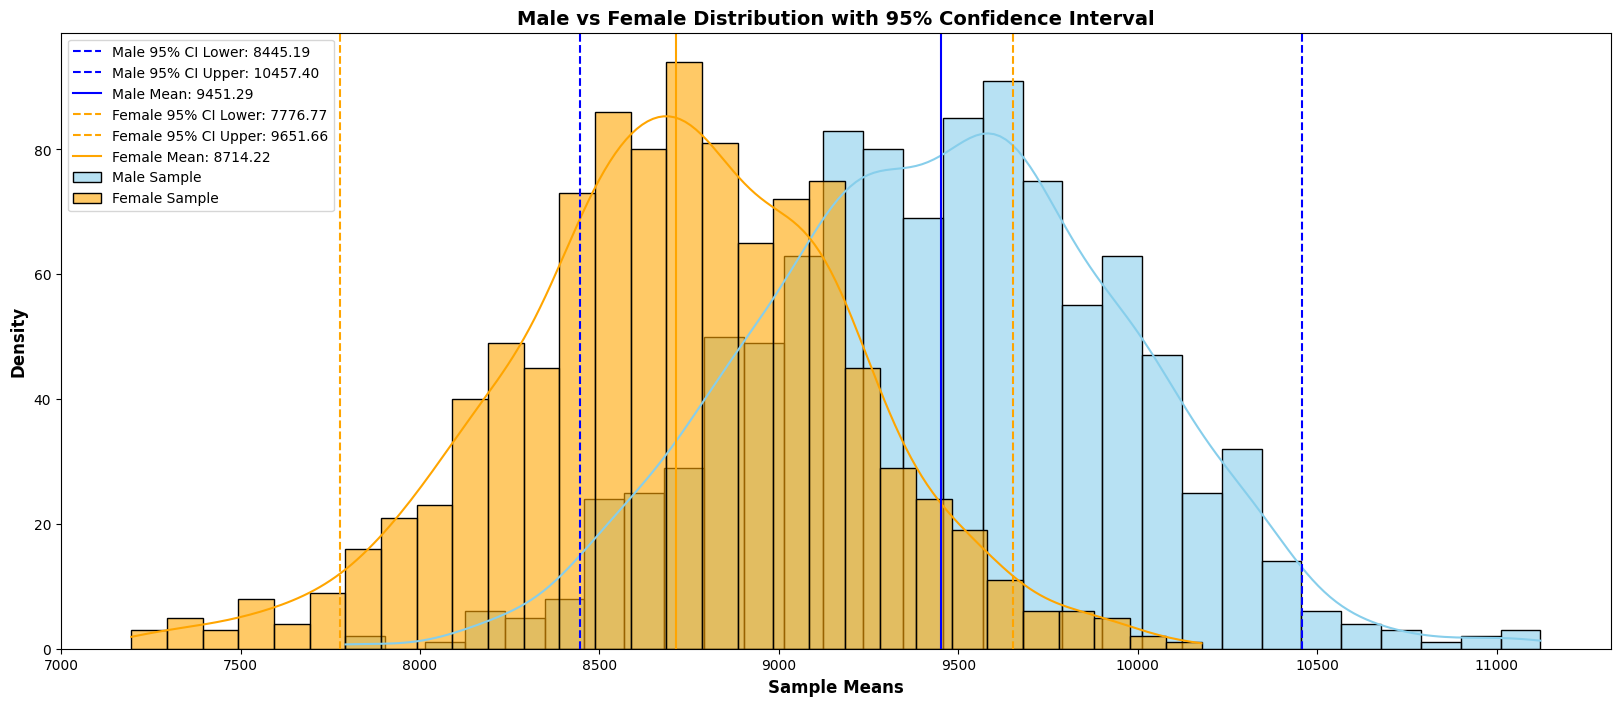

In [ ]:
fig=plt.figure(figsize=(20,8))
sns.histplot(male_sample_mean_100, bins=30, kde=True, color="skyblue", label="Male Sample", alpha=0.6)
sns.histplot(female_sample_mean_100, bins=30, kde=True, color="orange", label="Female Sample", alpha=0.6)

plt.axvline(x=male_lower_limit_100, color="blue", linestyle="--", label=f"Male 95% CI Lower: {male_lower_limit_100:.2f}")
plt.axvline(x=male_upper_limit_100, color="blue", linestyle="--", label=f"Male 95% CI Upper: {male_upper_limit_100:.2f}")
plt.axvline(x=sample_mean_100, color="blue", linestyle="-", label=f"Male Mean: {sample_mean_100:.2f}")

plt.axvline(x=female_lower_limit_100, color="orange", linestyle="--", label=f"Female 95% CI Lower: {female_lower_limit_100:.2f}")
plt.axvline(x=female_upper_limit_100, color="orange", linestyle="--", label=f"Female 95% CI Upper: {female_upper_limit_100:.2f}")
plt.axvline(x=f_sample_mean_100, color="orange", linestyle="-", label=f"Female Mean: {f_sample_mean_100:.2f}")

plt.title("Male vs Female Distribution with 95% Confidence Interval", fontsize=14, weight="bold")
plt.xlabel("Sample Means", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")
plt.legend(fontsize=10, loc="upper left")
plt.show()

**SIMILARLY CALCULATING CI for 90% CI FOR BOTH MALE AND FEMALE**

In [ ]:
#SAMPLE SIZE 300

print("FEMALE:")

# Boundaries of a 90% confidence interval (CI) for the distribution of sample means 5th and 95th percentile

f_l_limit_300=np.percentile(female_sample_mean_300,5)
f_u_limit_300=np.percentile(female_sample_mean_300,95)

print("5th Percentile Boundary:",f_l_limit_300)
print("95th Percentile Boundary:",f_u_limit_300)
print("-------------------------------------------------")

print("MALE:")

# Boundaries of a 90% confidence interval (CI) for the distribution of sample means 5th and 95th percentile

m_l_limit_300 = np.percentile(male_sample_mean_300,5)
m_u_limit_300 = np.percentile(male_sample_mean_300,95)

print("5th Percentile Boundary:",m_l_limit_300)
print("95th Percentile Boundary:",m_u_limit_300)


FEMALE:
5th Percentile Boundary: 8268.7525
95th Percentile Boundary: 9198.728500000001
-------------------------------------------------
MALE:
5th Percentile Boundary: 8952.657833333333
95th Percentile Boundary: 9921.369999999999


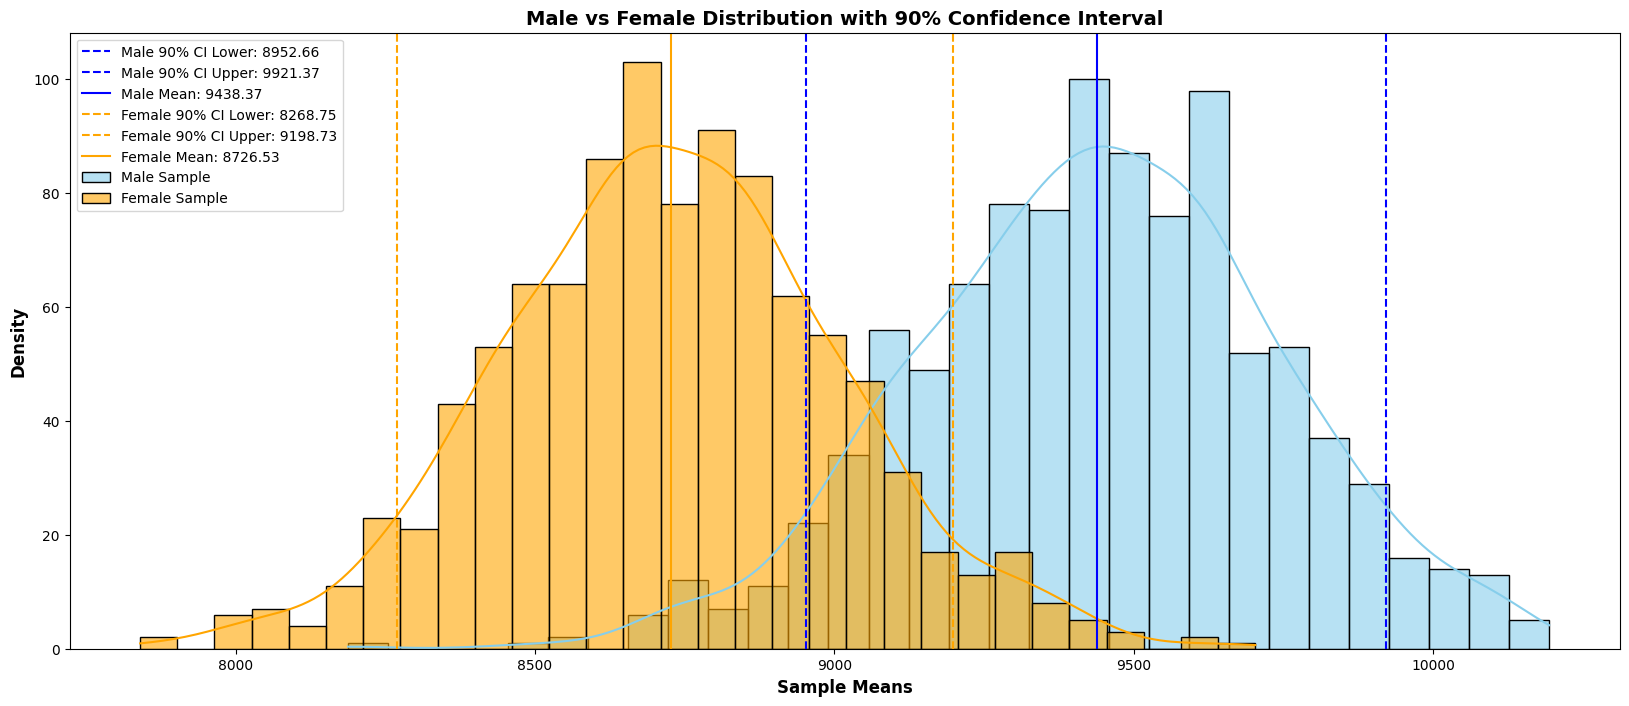

In [ ]:
fig=plt.figure(figsize=(20,8))
sns.histplot(male_sample_mean_300, bins=30, kde=True, color="skyblue", label="Male Sample", alpha=0.6)
sns.histplot(female_sample_mean_300, bins=30, kde=True, color="orange", label="Female Sample", alpha=0.6)

plt.axvline(x=m_l_limit_300, color="blue", linestyle="--", label=f"Male 90% CI Lower: {m_l_limit_300:.2f}")
plt.axvline(x=m_u_limit_300, color="blue", linestyle="--", label=f"Male 90% CI Upper: {m_u_limit_300:.2f}")
plt.axvline(x=sample_mean_300, color="blue", linestyle="-", label=f"Male Mean: {sample_mean_300:.2f}")

plt.axvline(x=f_l_limit_300, color="orange", linestyle="--", label=f"Female 90% CI Lower: {f_l_limit_300:.2f}")
plt.axvline(x=f_u_limit_300, color="orange", linestyle="--", label=f"Female 90% CI Upper: {f_u_limit_300:.2f}")
plt.axvline(x=f_sample_mean_300, color="orange", linestyle="-", label=f"Female Mean: {f_sample_mean_300:.2f}")

plt.title("Male vs Female Distribution with 90% Confidence Interval", fontsize=14, weight="bold")
plt.xlabel("Sample Means", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")
plt.legend(fontsize=10, loc="upper left")
plt.show()

**SIMILARLY CALCULATING CI for 99% CI FOR BOTH MALE AND FEMALE**

In [ ]:
#SAMPLE SIZE 600

print("FEMALE:")

# Boundaries of a 99% confidence interval (CI) for the distribution of sample means 0.5th and 99.5th percentile

f_l_limit=np.percentile(female_sample_mean_600,0.5)
f_u_limit=np.percentile(female_sample_mean_600,99.5)

print("5th Percentile Boundary:",f_l_limit)
print("95th Percentile Boundary:",f_u_limit)
print("-------------------------------------------------")

print("MALE:")

# Boundaries of a 99% confidence interval (CI) for the distribution of sample means 0.5th and 99.5th percentile

m_l_limit = np.percentile(male_sample_mean_600,0.5)
m_u_limit = np.percentile(male_sample_mean_600,99.5)

print("5th Percentile Boundary:",m_l_limit)
print("95th Percentile Boundary:",m_u_limit)


FEMALE:
5th Percentile Boundary: 8269.733316666667
95th Percentile Boundary: 9209.452558333332
-------------------------------------------------
MALE:
5th Percentile Boundary: 8947.181216666666
95th Percentile Boundary: 9985.145


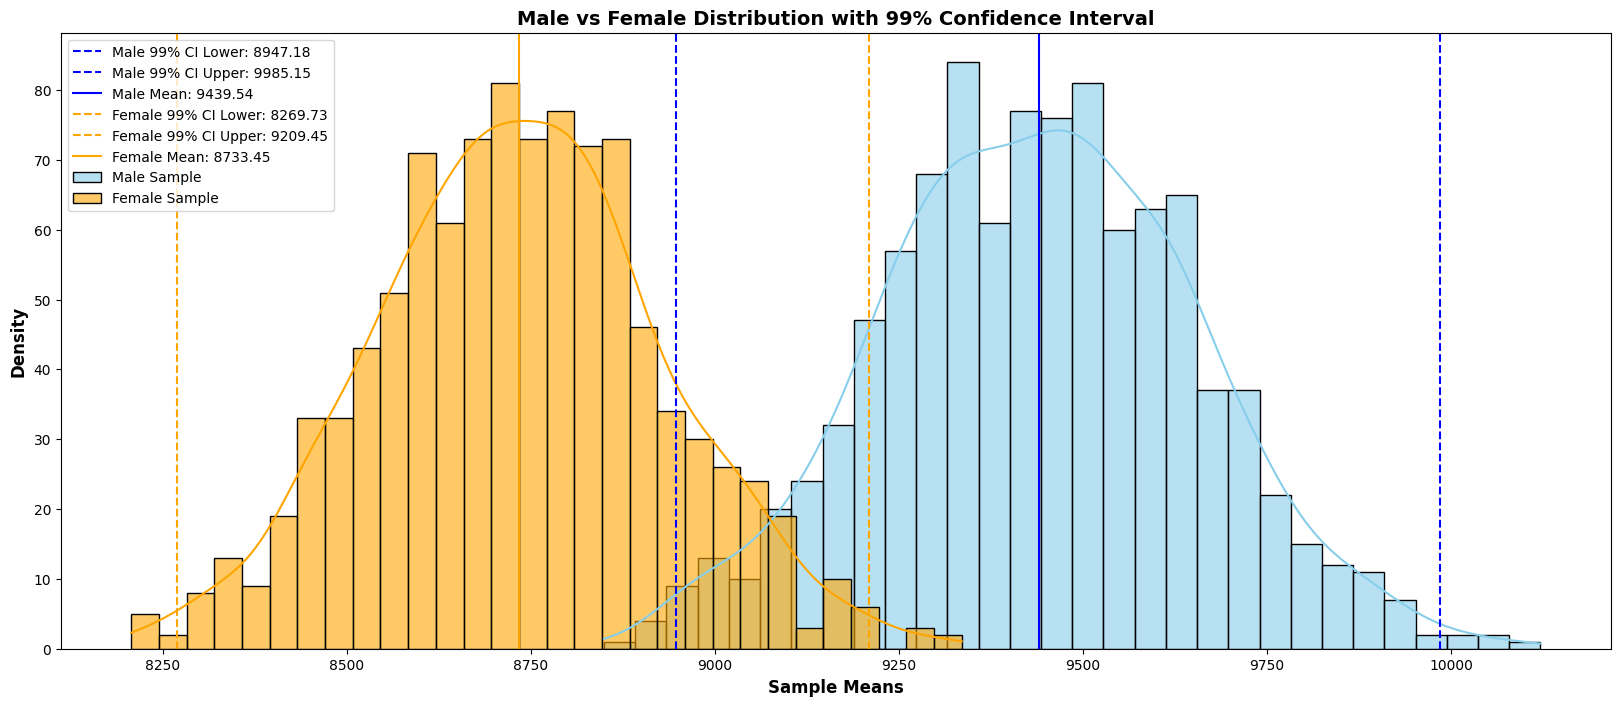

In [ ]:
fig=plt.figure(figsize=(20,8))
sns.histplot(male_sample_mean_600, bins=30, kde=True, color="skyblue", label="Male Sample", alpha=0.6)
sns.histplot(female_sample_mean_600, bins=30, kde=True, color="orange", label="Female Sample", alpha=0.6)

plt.axvline(x=m_l_limit, color="blue", linestyle="--", label=f"Male 99% CI Lower: {m_l_limit:.2f}")
plt.axvline(x=m_u_limit, color="blue", linestyle="--", label=f"Male 99% CI Upper: {m_u_limit:.2f}")
plt.axvline(x=sample_mean_600, color="blue", linestyle="-", label=f"Male Mean: {sample_mean_600:.2f}")

plt.axvline(x=f_l_limit, color="orange", linestyle="--", label=f"Female 99% CI Lower: {f_l_limit:.2f}")
plt.axvline(x=f_u_limit, color="orange", linestyle="--", label=f"Female 99% CI Upper: {f_u_limit:.2f}")
plt.axvline(x=f_sample_mean_600, color="orange", linestyle="-", label=f"Female Mean: {f_sample_mean_600:.2f}")

plt.title("Male vs Female Distribution with 99% Confidence Interval", fontsize=14, weight="bold")
plt.xlabel("Sample Means", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")
plt.legend(fontsize=10, loc="upper left")
plt.show()

**Confidence Intervals (99% CI):**

- The dashed vertical lines mark the lower and upper bounds of the 99% CI for males and females, with separate colors (blue for males and orange for females).

- For males:
  - 99% CI Lower Bound: ~8947
  - 99% CI Upper Bound: ~9985
- For females:
  - 99% CI Lower Bound: ~8269
  - 99% CI Upper Bound: ~9209

- These intervals provide a range within which the true population means are likely to fall 99% of the time.

- **Means:**
  - The solid vertical lines represent the sample means:
  - Male Mean: ~9439
  - Female Mean: ~8733
    - The male mean is higher than the female mean, suggesting a notable difference in their respective averages.
- **Overlap:**
  - The male and female confidence intervals have minimal overlap, suggesting that the means are statistically different at the 99% confidence level.

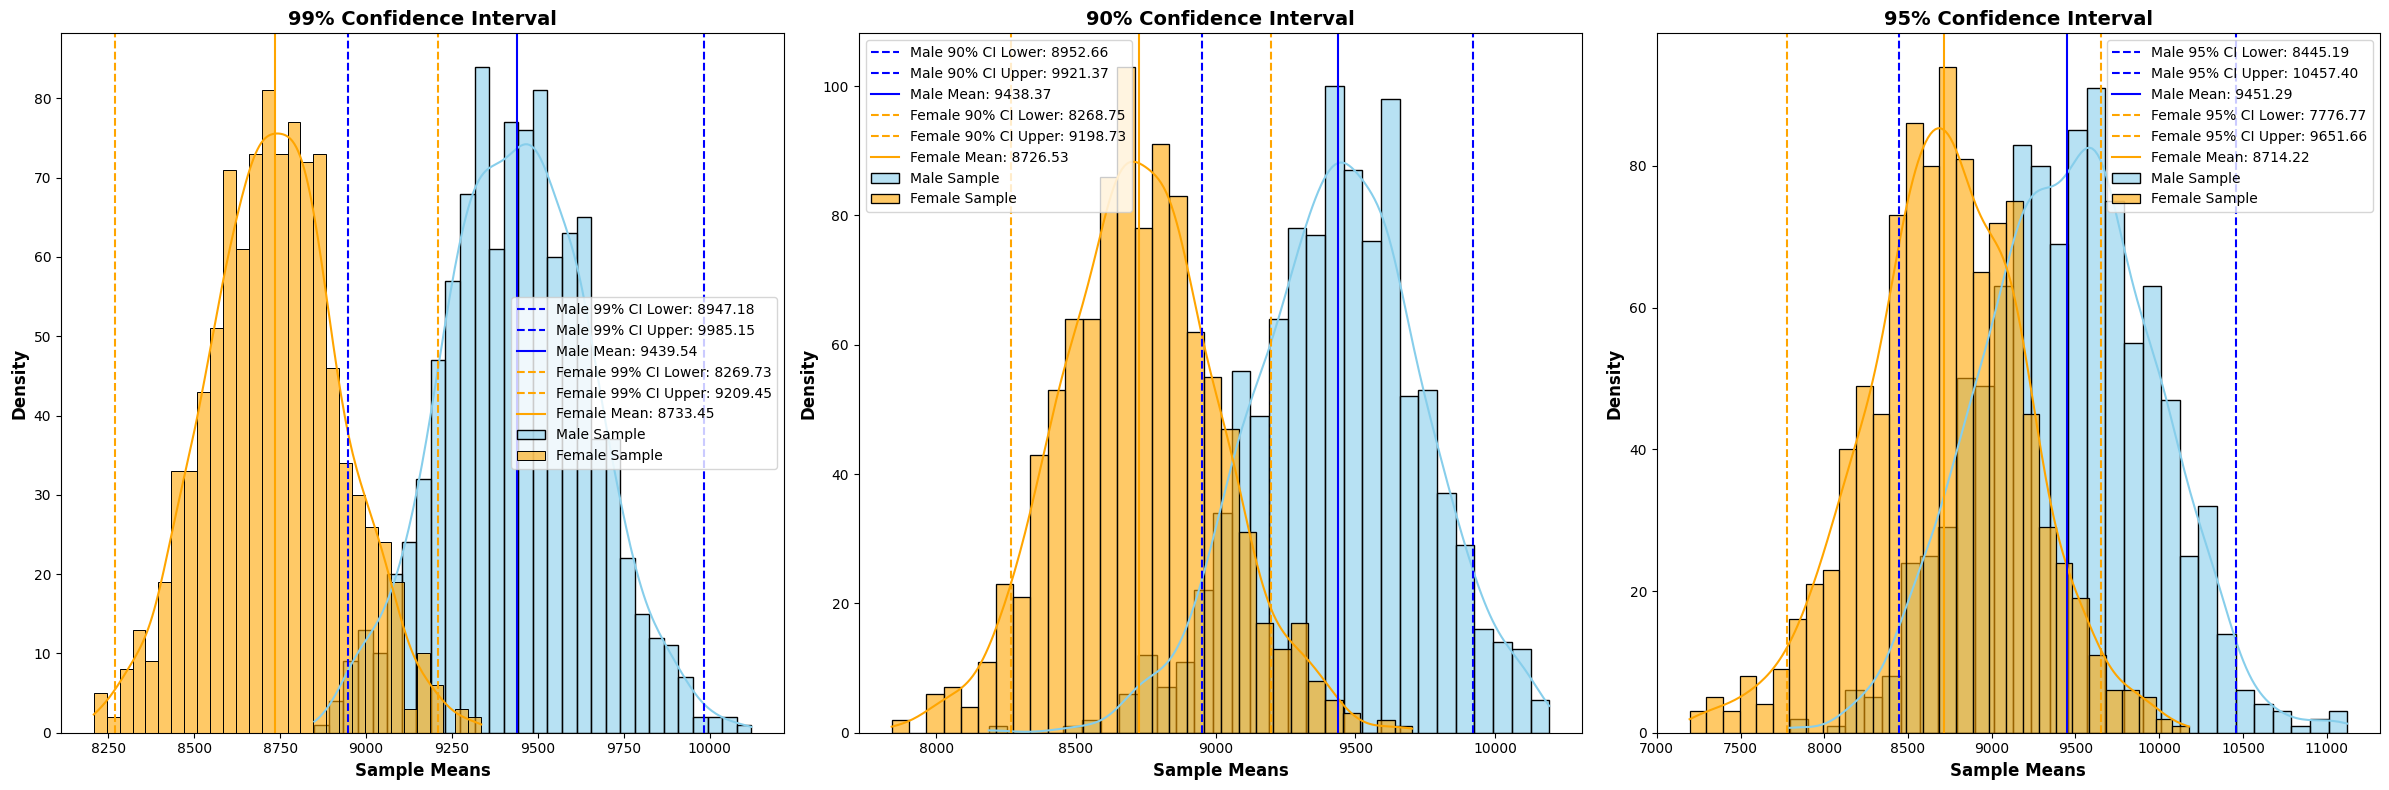

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot 1: Male vs Female with 99% CI
sns.histplot(male_sample_mean_600, bins=30, kde=True, color="skyblue", label="Male Sample", alpha=0.6, ax=axs[0])
sns.histplot(female_sample_mean_600, bins=30, kde=True, color="orange", label="Female Sample", alpha=0.6, ax=axs[0])
axs[0].axvline(x=m_l_limit, color="blue", linestyle="--", label=f"Male 99% CI Lower: {m_l_limit:.2f}")
axs[0].axvline(x=m_u_limit, color="blue", linestyle="--", label=f"Male 99% CI Upper: {m_u_limit:.2f}")
axs[0].axvline(x=sample_mean_600, color="blue", linestyle="-", label=f"Male Mean: {sample_mean_600:.2f}")
axs[0].axvline(x=f_l_limit, color="orange", linestyle="--", label=f"Female 99% CI Lower: {f_l_limit:.2f}")
axs[0].axvline(x=f_u_limit, color="orange", linestyle="--", label=f"Female 99% CI Upper: {f_u_limit:.2f}")
axs[0].axvline(x=f_sample_mean_600, color="orange", linestyle="-", label=f"Female Mean: {f_sample_mean_600:.2f}")
axs[0].set_title("99% Confidence Interval", fontsize=14, weight="bold")
axs[0].set_xlabel("Sample Means", fontsize=12, weight="bold")
axs[0].set_ylabel("Density", fontsize=12, weight="bold")
axs[0].legend(fontsize=10)

# Plot 2: Male vs Female with 90% CI
sns.histplot(male_sample_mean_300, bins=30, kde=True, color="skyblue", label="Male Sample", alpha=0.6, ax=axs[1])
sns.histplot(female_sample_mean_300, bins=30, kde=True, color="orange", label="Female Sample", alpha=0.6, ax=axs[1])
axs[1].axvline(x=m_l_limit_300, color="blue", linestyle="--", label=f"Male 90% CI Lower: {m_l_limit_300:.2f}")
axs[1].axvline(x=m_u_limit_300, color="blue", linestyle="--", label=f"Male 90% CI Upper: {m_u_limit_300:.2f}")
axs[1].axvline(x=sample_mean_300, color="blue", linestyle="-", label=f"Male Mean: {sample_mean_300:.2f}")
axs[1].axvline(x=f_l_limit_300, color="orange", linestyle="--", label=f"Female 90% CI Lower: {f_l_limit_300:.2f}")
axs[1].axvline(x=f_u_limit_300, color="orange", linestyle="--", label=f"Female 90% CI Upper: {f_u_limit_300:.2f}")
axs[1].axvline(x=f_sample_mean_300, color="orange", linestyle="-", label=f"Female Mean: {f_sample_mean_300:.2f}")
axs[1].set_title("90% Confidence Interval", fontsize=14, weight="bold")
axs[1].set_xlabel("Sample Means", fontsize=12, weight="bold")
axs[1].set_ylabel("Density", fontsize=12, weight="bold")
axs[1].legend(fontsize=10)

# Plot 3: Male vs Female with 95% CI
sns.histplot(male_sample_mean_100, bins=30, kde=True, color="skyblue", label="Male Sample", alpha=0.6, ax=axs[2])
sns.histplot(female_sample_mean_100, bins=30, kde=True, color="orange", label="Female Sample", alpha=0.6, ax=axs[2])
axs[2].axvline(x=male_lower_limit_100, color="blue", linestyle="--", label=f"Male 95% CI Lower: {male_lower_limit_100:.2f}")
axs[2].axvline(x=male_upper_limit_100, color="blue", linestyle="--", label=f"Male 95% CI Upper: {male_upper_limit_100:.2f}")
axs[2].axvline(x=sample_mean_100, color="blue", linestyle="-", label=f"Male Mean: {sample_mean_100:.2f}")
axs[2].axvline(x=female_lower_limit_100, color="orange", linestyle="--", label=f"Female 95% CI Lower: {female_lower_limit_100:.2f}")
axs[2].axvline(x=female_upper_limit_100, color="orange", linestyle="--", label=f"Female 95% CI Upper: {female_upper_limit_100:.2f}")
axs[2].axvline(x=f_sample_mean_100, color="orange", linestyle="-", label=f"Female Mean: {f_sample_mean_100:.2f}")
axs[2].set_title("95% Confidence Interval", fontsize=14, weight="bold")
axs[2].set_xlabel("Sample Means", fontsize=12, weight="bold")
axs[2].set_ylabel("Density", fontsize=12, weight="bold")
axs[2].legend(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


<font color = "blue">**ANALYSIS**<font>

*   The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean.
*   This demonstrates the first property of the Central Limit theorem. Sampling Distribution Mean ~ Population Mean
*   On average, Male spends more than Female.
*   We noticed that as we increased the sample size, the distribution beomes better , more normal and the deviation is also less.
*   The larger the sample size, the more closely the sampling distribution will follow a normal distribution.

*   **Interpretation of CI Results:**
    - In the 99% CI (left plot), the bounds are widest, indicating a broader range for possible means.
    - The 90% CI (middle plot) has narrower bounds, indicating a more focused range with less uncertainty.
    - The 95% CI (right plot) strikes a balance between width and confidence, which is often used as a standard in statistics.











# **SAMPLE MEAN AND CI ANALYSIS BASED ON MARITAL STATUS**

## **SAMPLE MEAN**

In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


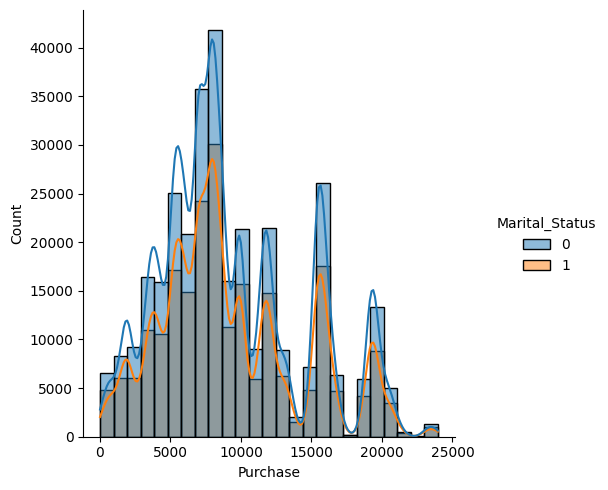

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Marital_Status', data=df )

<font color = "blue">**ANALYSIS**<font>

The plot shows that both the marital categories almost follow a Normal Distribution.

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

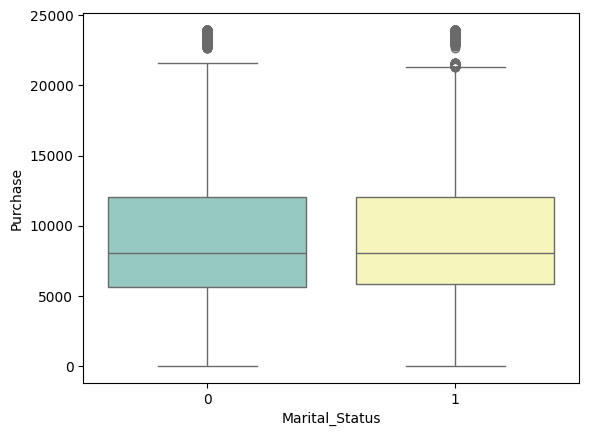

In [ ]:
sns.boxplot(data=df, y='Purchase', x="Marital_Status", hue="Marital_Status", palette="Set3" ,legend=False)

<font color = "blue">**ANALYSIS**<font>

The box-plot suggests that there is <font color = "blue"> almost no difference in the medians</font> of **Married and Unmarried poulation distribution**.

Instead of conducting visual-graphical analysis, we can use **Hypothesis Testing** to check if the mean values are significantly different or not.


As we are dealing with medians, the best case scenario for testing is the **Kruskal-Wallis test**, which <font color = "blue">uses median for testing and ignores the outliers for the same</font>.

In [ ]:
import scipy.stats as stats

#NULL HYPOTHESIS : Both groups have similar median.
#ALTERNATE HYPOTHESIS : Both groups have different median.

group1=df[df['Marital_Status']==1]['Purchase']
group2=df[df['Marital_Status']==0]['Purchase']


# Perform the Kruskal-Wallis test
stat, p_value = stats.kruskal(group1, group2)

print("Kruskal-Wallis H statistic:", stat)
print("P-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group has different median.")
else:
    print("Fail to reject the null hypothesis: All groups have similar median.")

Kruskal-Wallis H statistic: 0.6836769598098608
P-value: 0.4083234445128511
Fail to reject the null hypothesis: All groups have similar median.


<font color = "blue">**ANALYSIS**<font>

The Null Hypothesis could not be rejected which states that both the groups have equal median as in sync with the graphical analysis.

**CALCULATING MEAN FOR MARITAL STATUS**

In [ ]:
group1=df[df['Marital_Status']==1]['Purchase']
group2=df[df['Marital_Status']==0]['Purchase']

married_mean = group1.mean()
unmarried_mean = group2.mean()

print("Unmarried Mean:", unmarried_mean)
print("Married Mean:", married_mean)

Unmarried Mean: 9265.907618921507
Married Mean: 9261.174574082374


<font color = "blue">**ANALYSIS**<font>

<font color = 'red'>The means of both the groups - Married and Unmarried tend to be nearly equal,
and the **Kruskal Wallis Test** on the median also signifies the congruency of both the groups.<font>

# **SAMPLE MEAN AND CI ANALYSIS BASED ON AGE GROUPS**

<Axes: xlabel='Age', ylabel='Purchase'>

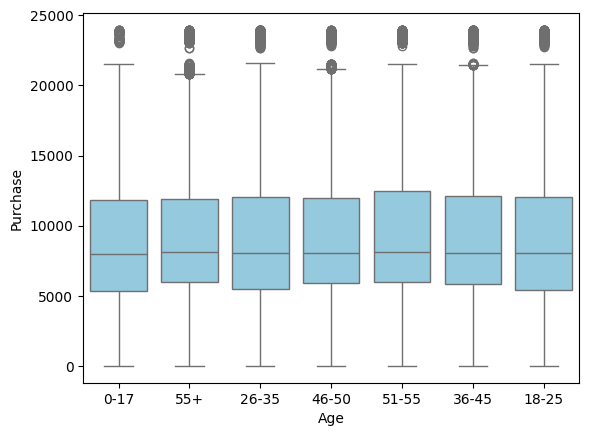

In [ ]:
sns.boxplot(data=df, y='Purchase', x="Age", color = 'skyblue' ,legend=False)

<font color = "blue">**ANALYSIS**<font>


The visual analysis of AGE GROUP vs PURCHASE clearly states equal contribution from different age groups of population to the Purchase Attribute of Walmart.

Text(0.5, 1.0, 'Age Group Share in Numbers')

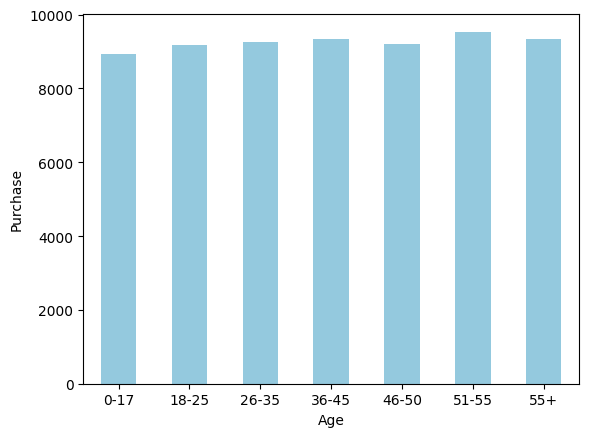

In [ ]:
a = df.groupby("Age")["Purchase"].mean()
b = pd.DataFrame(a).reset_index()

sns.barplot(x='Age', y='Purchase', data=b, width=0.5, color='skyblue')
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%d', weight="bold")
axs[1].set_xlabel("Age", weight="bold")
axs[1].set_ylabel("Purchase", weight="bold")
axs[1].set_title("Age Group Share in Numbers", weight="bold", pad=10)

<font color = "blue">**ANALYSIS**<font>

The graph clearly implies almost equal mean values for all the age groups, with slight difference in their behaviour.

This can be well understood after calculating Confidence Intervals for all the groups as done below.

In [ ]:
# Calculate mean purchase for each age group
age_group_means = df.groupby("Age")["Purchase"].mean()

print("Average Purchase Amount by Age Group:")
print(age_group_means)
print("--------------------------------------------------------------------------------------------")
import scipy.stats as stats

# Define confidence levels
confidence_levels = [0.90, 0.95, 0.99]

# Calculate confidence intervals for each level and each age group
for confidence in confidence_levels:
    print(f"\nConfidence Level: {int(confidence * 100)}%")
    print("--------------------------------------------------------------------------------------------")
    for age_bin, group in df.groupby("Age"):
        sample = group["Purchase"]
        mean = sample.mean()
        sem = stats.sem(sample)
        ci = stats.t.interval(confidence, len(sample)-1, loc=mean, scale=sem)
        print(f"  Age Group: {age_bin}, Mean: {mean:.2f}, {int(confidence*100)}% CI: {ci}")


Average Purchase Amount by Age Group:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
--------------------------------------------------------------------------------------------

Confidence Level: 90%
--------------------------------------------------------------------------------------------
  Age Group: 0-17, Mean: 8933.46, 90% CI: (8865.049497531349, 9001.8797833586)
  Age Group: 18-25, Mean: 9169.66, 90% CI: (9143.432787777778, 9195.8944247448)
  Age Group: 26-35, Mean: 9252.69, 90% CI: (9235.102926382391, 9270.278339357385)
  Age Group: 36-45, Mean: 9331.35, 90% CI: (9306.441166444858, 9356.26022339089)
  Age Group: 46-50, Mean: 9208.63, 90% CI: (9170.406084331049, 9246.845310605606)
  Age Group: 51-55, Mean: 9534.81, 90% CI: (9492.160404787175, 9577.455657133296)
  Age Group: 55+, Mean: 9336.28, 90% CI: (9280.065285868366, 9392.495633030443)

Conf

<font color = "blue">**ANALYSIS**<font>

The mean and CI analysis at different level shows that the age group 0-17 yrs is the least contributor to purchase value, while 51-55 yr group contributes to the maximum purchase value owing to the successful life endeavours.



# **SUMMARY**
*   **Age Groups**:
    - The age group 26-35 emerged as the largest contributor to purchases, indicating they are the most active consumer segment.
    - Younger (18-25) and middle-aged (36-45) groups also showed significant purchasing power, while older and the (0-17) age groups contributed less.

*   **Gender Trends**:
    - Male customers accounted for a higher share of purchases compared to female customers.
    - However, females demonstrated high spending potential in specific product categories, suggesting an opportunity to target them with tailored marketing strategies.

*   **Marital Status**:
    - Married individuals contributed more to total purchases than unmarried individuals.
    - This trend suggests that family-oriented campaigns or promotions could be effective.

*   **City Categories**:
    - Customers from Category B cities dominated purchases, followed by Category C and Category A.
    - Walmart may consider strengthening its presence and customer engagement strategies in Category B and C cities to maximize sales.

*   **Product Categories**:
    - Certain product categories like 1,5 and 8 saw significantly higher purchases.
    - Walmart can optimize inventory, pricing, and marketing campaigns around these high-demand categories.
*   **Spending Patterns**:
    - Confidence interval (CI) and mean analyses highlighted that most customer spending fell within predictable ranges, helping in demand forecasting and budget planning.





# **RECOMMENDATIONS**

*   **Age-Focused Marketing:**
    - Devise age-specific campaigns, particularly targeting the 26-35 age group, which represents the most active consumers.
*   **Gender-Specific Promotions:**
    - Tailor promotions for female customers in product categories where their spending is strong.

*   **City-Specific Strategies:**
    - Expand outreach and resources in Category B and C cities, as they drive the majority of sales.
*   **Enhance Product Categories:**
    -  Focus on optimizing the supply  for high-demand product categories while identifying and promoting underperforming ones.

*   **Loyalty Programs:**
    - Introduce or refine loyalty programs to retain married customers and encourage higher spending among younger demographics.













# **CONCLUSION**


This analysis has uncovered valuable insights into customer behavior, preferences, and purchasing trends, which can guide **Walmart** in refining its marketing and operational strategies. By focusing on age-specific promotions, gender-oriented campaigns, and city-specific resource allocation, Walmart can improve customer satisfaction and maximize revenue potential.

Ultimately, the data reveals opportunities for growth in key demographics and product categories, while emphasizing the importance of data-driven decision-making in optimizing business strategies. With these insights, Walmart is well-positioned to better meet customer needs, drive sales, and strengthen its market position in the retail industry.